In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_csv('C:/Users/ADMIN/Downloads/archive/spam.csv', encoding='latin-1', engine="python", usecols=['v1', 'v2'])
df.columns = ["label", "message"]


In [4]:
print("Dataset Overview:\n")
print(df.head())  
print("\nDataset Summary:\n")
print(df.describe())
print("\nDataset Info:\n")
print(df.info())

Dataset Overview:

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Summary:

       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [5]:
print("\nMissing Values:", df.isnull().sum().sum())
print("Duplicate Rows:", df.duplicated().sum())


Missing Values: 0
Duplicate Rows: 403


In [6]:
df.drop_duplicates(inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11928\3234678843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="pastel")


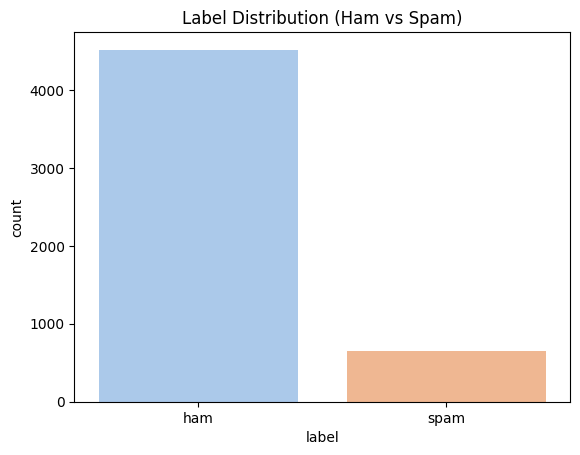

In [7]:
sns.countplot(x="label", data=df, palette="pastel")
plt.title("Label Distribution (Ham vs Spam)")
plt.show()


In [8]:
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"].values)


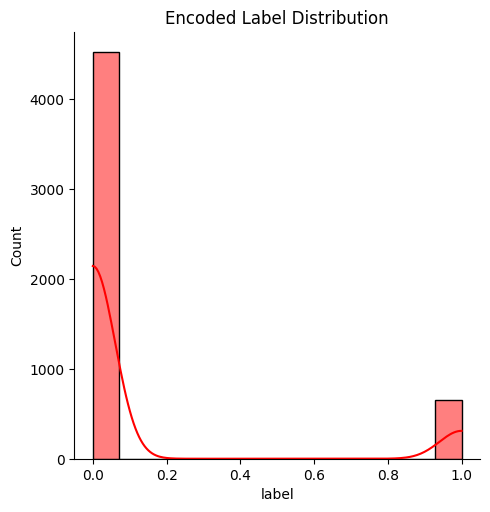

In [9]:
sns.displot(df.label, kde=True, color="red")
plt.title("Encoded Label Distribution")
plt.show()

In [10]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'\d+', '', text)  
    text = text.lower().strip()      
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [11]:
df['message'] = df['message'].apply(clean_text)

In [12]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df["message"])
y = df["label"]


In [13]:
print(f"\nDataset after Cleaning: {df.shape}")
print("Label Counts:", df['label'].value_counts())


Dataset after Cleaning: (5169, 2)
Label Counts: label
0    4516
1     653
Name: count, dtype: int64


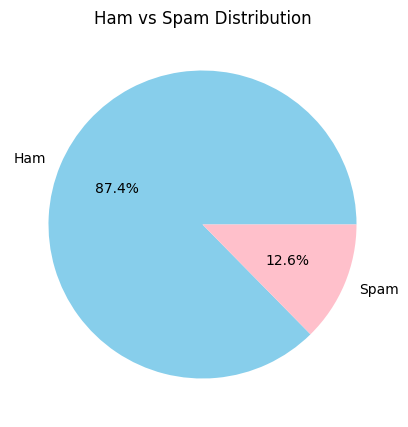

In [14]:
p, k = len(df[df["label"] == 0]), len(df[df["label"] == 1])
label = np.array(["Ham", "Spam"])
values = np.array([p, k])
plt.figure(figsize=(5, 5))
plt.pie(values, labels=label, autopct="%.1f%%", colors=["skyblue", "pink"])
plt.title("Ham vs Spam Distribution")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
naive_bayes_model = MultinomialNB(alpha=0.1)
logistic_regression_model = LogisticRegression(C=10, max_iter=1000)
svm_model = SVC(C=1, kernel='linear')


In [17]:
naive_bayes_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [18]:
nb_predictions = naive_bayes_model.predict(X_test)
lr_predictions = logistic_regression_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)


In [19]:
def evaluate_model(model_name, y_test, predictions):
    print(f"{model_name} Model:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print()

In [20]:
evaluate_model("Naive Bayes", y_test, nb_predictions)
evaluate_model("Logistic Regression", y_test, lr_predictions)
evaluate_model("SVM", y_test, svm_predictions)

Naive Bayes Model:
Confusion Matrix:
 [[882   7]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95      0.90      0.93       145

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.9796905222437138

Logistic Regression Model:
Confusion Matrix:
 [[884   5]
 [ 21 124]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.86      0.91       145

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.95      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy:  0.9748549323017408

SVM Model:
Confusion Matrix:
 [[887   2]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99   

In [21]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, nb_predictions),
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, svm_predictions)
]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11928\2680900537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


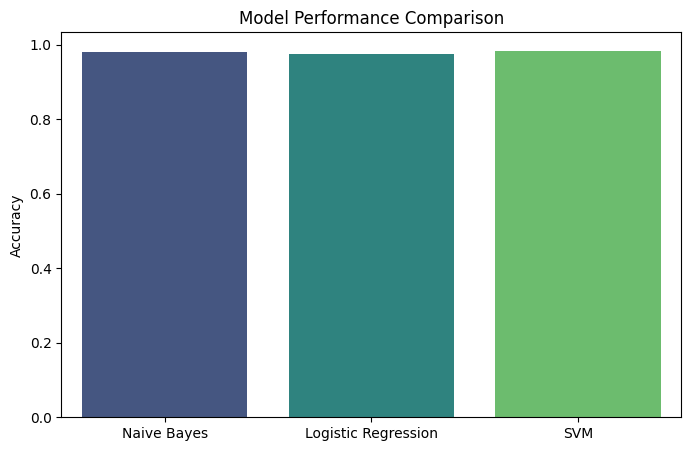

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()